In [ ]:
pip install scikit-plot

**DATA READING**

In [71]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

%matplotlib inline

In [72]:
data = pd.read_csv('/content/Human_vital_signs_R.csv',index_col=0)


In [73]:
data.head(100)

,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,94.0,21.0,97.0,36.2,Normal
1,1,94.0,25.0,97.0,36.2,Normal
2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...
95,95,92.0,23.0,97.0,29.0,Normal
96,96,93.0,23.0,97.0,29.0,Normal
97,97,93.0,23.0,97.0,40.0,Abnormal
98,98,93.0,23.0,97.0,40.0,Abnormal


**Data Cleaning**

In [74]:
null_counts = data.isnull().sum()

In [75]:
print(null_counts)

Time (s)         0
 HR (BPM)        5
 RESP (BPM)    147
 SpO2 (%)      127
TEMP (*C)        0
OUTPUT           0
dtype: int64


In [76]:
data.fillna(data.median(), inplace=True)

In [77]:
null_counts = data.isnull().sum()
print(null_counts)

Time (s)       0
 HR (BPM)      0
 RESP (BPM)    0
 SpO2 (%)      0
TEMP (*C)      0
OUTPUT         0
dtype: int64


In [78]:
data.columns = ['Time', 'HR', 'RESP', 'SPO2', "Temp",'OUTPUT']
data

,Time,HR,RESP,SPO2,Temp,OUTPUT
0,0,94.0,21.0,97.0,36.2,Normal
1,1,94.0,25.0,97.0,36.2,Normal
2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...
476,476,56.0,12.0,101.0,33.0,Abnormal
477,477,94.0,25.0,98.0,36.4,Normal
478,478,94.0,21.0,97.0,36.2,Normal
479,479,93.0,27.0,95.0,37.0,Normal


from matplotlib import pyplot as plt
data['HR'].plot(kind='hist', bins=20, title='HR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['RESP'].plot(kind='hist', bins=20, title='RESP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['SPO2'].plot(kind='hist', bins=20, title='SPO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Temp'].plot(kind='hist', bins=20, title='Temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='HR', y='RESP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='RESP', y='SPO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SPO2', y='Temp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['HR'].plot(kind='line', figsize=(8, 4), title='HR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['RESP'].plot(kind='line', figsize=(8, 4), title='RESP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['SPO2'].plot(kind='line', figsize=(8, 4), title='SPO2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Temp'].plot(kind='line', figsize=(8, 4), title='Temp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [79]:
data.drop(columns=['Time'], inplace=True)

**DATA VISUALIZATION**

<Axes: xlabel='HR', ylabel='Count'>

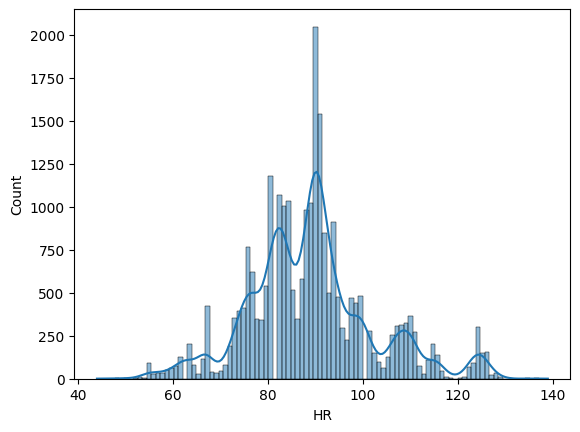

In [80]:
import seaborn as sns
sns.histplot(data['HR'], kde= True)

<Axes: xlabel='RESP', ylabel='Count'>

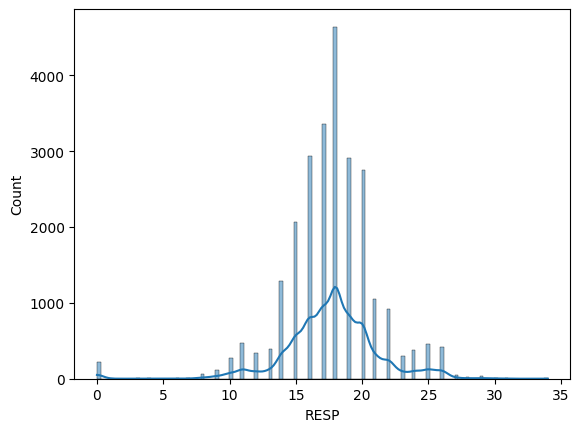

In [81]:
sns.histplot(data['RESP'], kde= True)

<Axes: xlabel='SPO2', ylabel='Count'>

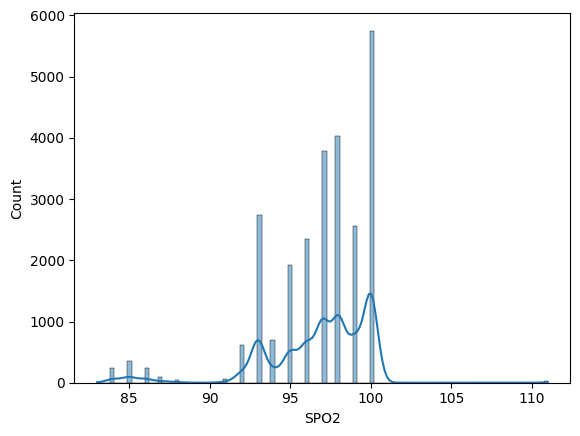

In [82]:
sns.histplot(data['SPO2'], kde= True)

<Axes: xlabel='Temp', ylabel='Count'>

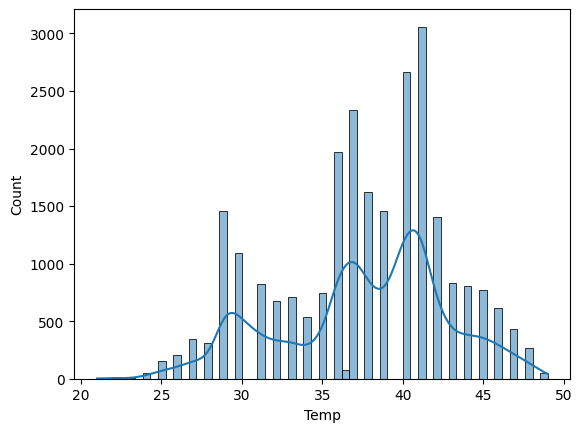

In [83]:
sns.histplot(data['Temp'], kde= True)

**MODEL TRAINING**

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def Data_Process():

    """
    This will read the CSV and Normalize the Data and
    Perform Train Test Split and Return
    X_Train, X_Test, Y_Train, Y_Test

    """
    # Name for the column  or Features Map
    columns_to_named = ['HR', 'RESP','SPO2',"Temp","OUTPUT"]

    # Read the Dataset and Rename the Column

    col_norm =['HR', 'RESP','SPO2',"Temp"]

    # Normalization using Custom Lambda Function

    df1_norm = data[col_norm]

    X_Data = df1_norm
    Y_Data = data["OUTPUT"]


    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)

    return X_Train.astype(float), X_Test.astype(float), Y_Train, Y_Test


In [118]:
def create_feature_column():
    feat_HR = tf.feature_column.numeric_column('HR')
    feat_RESP = tf.feature_column.numeric_column('RESP')
    feat_SPO2 = tf.feature_column.numeric_column('SPO2')
    feat_Temp = tf.feature_column.numeric_column('Temp')

    feature_column = [feat_HR, feat_RESP, feat_SPO2, feat_Temp]

    return feature_column


# Use categorical column for labels
def create_target_column():
    feat_OUTPUT = tf.feature_column.categorical_column_with_identity('OUTPUT', num_buckets=2)
    return [feat_OUTPUT]

In [119]:
X_Train, X_Test, Y_Train, Y_Test = Data_Process()
feature_columns = create_feature_column()
target_columns = create_target_column()

train_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_Train,
    y=Y_Train,
    batch_size=40,
    num_epochs=1000,
    shuffle=True
)

eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_Test,
    y=Y_Test,
    batch_size=40,
    num_epochs=1,
    shuffle=False
)

predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_Test,
    num_epochs=1,
    shuffle=False
)

In [143]:
data['OUTPUT'] = data['OUTPUT'].map({'Normal': 0, 'Abnormal': 1})

Y_Train = Y_Train.map({'Normal': 0, 'Abnormal': 1})
Y_Test = Y_Test.map({'Normal': 0, 'Abnormal': 1})

model = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[10, 10],  # Adjust the hidden layer sizes as needed
    n_classes=2
)

In [144]:
history = model.train(input_fn=train_input_func, steps = 1000)

**MODEL EVALUATION**

In [145]:
# Evaluate the model
results = model.evaluate(input_fn=eval_input_func)

# Print accuracy
accuracy = results['accuracy']
print(f'Accuracy: {accuracy}')

Accuracy: 0.8798378705978394


**PREDICT FROM GIVEN INPUT VALUES**



In [161]:
import warnings
warnings.filterwarnings("ignore")

def final_model(new_data, threshold=0.8):
    # Create a function to input the preprocessed data into the model
    def predict_input_fn():
        return tf.compat.v1.estimator.inputs.pandas_input_fn(
            x=new_data,
            num_epochs=1,
            shuffle=False
        )()

    # Make predictions
    predictions = list(model.predict(input_fn=predict_input_fn))

    # Extract the predicted probability for class 1
    predicted_probabilities = [prediction['probabilities'][1] for prediction in predictions]

    # Make a decision based on the probability threshold
    if any(probability >= threshold for probability in predicted_probabilities):
        print('Abnormal')
    else:
        print('Normal')

new_data = pd.DataFrame({
    'HR': [100],
    'RESP': [13],
    'SPO2': [95],
    'Temp': [35]
})
final_model(new_data)


Normal


**SAVE MODEL**

In [185]:
model_dir = "saved_model/my_model"

# Export the model
feature_spec = tf.feature_column.make_parse_example_spec(feature_columns)
serving_input_receiver_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)

saved_model_path = model.export_saved_model(model_dir, serving_input_receiver_fn=serving_input_receiver_fn)

**LOAD MODEL**

In [186]:
loaded_model = tf.saved_model.load(saved_model_path)

In [ ]:
new_data = pd.DataFrame({
    'HR': [90],
    'RESP': [14],
    'SPO2': [98],
    'Temp': [36]
})

input_data = {
    'HR': tf.convert_to_tensor(new_data['HR'], dtype=tf.int64),
    'RESP': tf.convert_to_tensor(new_data['RESP'], dtype=tf.int64),
    'SPO2': tf.convert_to_tensor(new_data['SPO2'], dtype=tf.int64),
    'Temp': tf.convert_to_tensor(new_data['Temp'], dtype=tf.int64)
}

# Use the loaded model to make predictions
predictions = loaded_model.predict(input_data)

# Extract the predicted class
predicted_class = tf.argmax(predictions['class_ids'][0]).numpy()

# Print the predicted class
if predicted_class == 1:
    print('Abnormal')
else:
    print('Normal')